<img src=images/MIT_logo.jpg width=150 align=right />

# PROFESSIONAL CERTIFICATE IN DATA SCIENCE AND ANALYTICS

# Linear Regression: Part One

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [2]:
def abline(intercept, slope, color):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    x_vals, y_vals = x_vals.reshape(-1, 1),y_vals.reshape(-1, 1)
    plt.plot(x_vals, y_vals, '--', color=color)

## Simple linear regression
$$y = b + wx$$

We want to find an optimal set of values for $w$ and $b$ that minimize the residuals.

[9.39301572] [[2.10421414]]


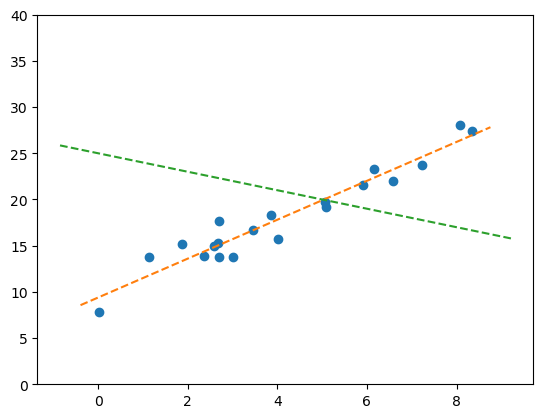

In [3]:
x = np.random.uniform(0, 10, 20)
y = 10 + x * 2 + np.random.randn(20) * 2
x, y = x.reshape(-1, 1), y.reshape(-1, 1)

lr = LinearRegression()
lr.fit(x, y)

print(lr.intercept_, lr.coef_)

plt.scatter(x, y)
abline(lr.intercept_, lr.coef_, 'tab:orange')
abline(25, -1, 'tab:green')
plt.ylim((0, 40))

plt.show()

## Multiple linear regression
Each data point now has many values (dimensions), not just X.

We still want to predict a single Y by finding an optimal vector of coefficients.

$$
y = b + w_1x_1 + w_2x_2 + \ldots + w_nx_n
$$

$$
y = w_01 + w_1x_1 + w_2x_2 + \ldots + w_nx_n
$$

In [4]:
n = 100
y = np.random.uniform(0, 1, n)
X = np.array([y *  2 + np.random.randn(n) * 1,
              y *  5 + np.random.randn(n) * 1,
              y * -3 + np.random.randn(n) * 1]).reshape(3, n).T

lr = LinearRegression()
lr.fit(X, y)

print(lr.intercept_, lr.coef_)

0.11188128436095279 [ 0.05911987  0.0986361  -0.06080253]


In [5]:
df = pd.DataFrame(X, columns=['x1', 'x2', 'x3'])
df['y'] = pd.Series(y)
df

,x1,x2,x3,y
0,0.294982,-1.733666,2.435409,0.036110
1,1.092563,3.829175,-2.491718,0.912366
2,1.583250,4.944138,-1.638458,0.673580
3,0.599880,-2.029958,0.399593,0.037187
4,0.911014,2.074438,-1.305181,0.472697
...,...,...,...,...
95,1.313279,3.322518,-3.063117,0.744977
96,0.474695,1.066763,-1.561341,0.258404
97,0.568782,3.120273,-1.772464,0.573371
98,1.063883,3.314937,-3.693434,0.805659


In [6]:
model = smf.ols('y ~ x1 + x2 + x3', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     150.3
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           3.83e-36
Time:                        10:32:16   Log-Likelihood:                 63.713
No. Observations:                 100   AIC:                            -119.4
Df Residuals:                      96   BIC:                            -109.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1119      0.022      5.111      0.000       0.068       0.155
x1             0.0591      0.013      4.683      0.000       0.034       0.084
x2             0.0986      0.010      9.837      0.000       0.079       0.119
x3            -0.0608      0.014     -4.359      0.000      -0.088      -0.033
==============================================================================
Omnibus:                        0.473   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.789   Jarque-Bera (JB):                0.620
Skew:                          -0.061   Prob(JB):                        0.733
Kurtosis:                       2.634   Cond. No.                         6.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## R<sup>2</sup>: coefficient of determination

$R^2 = 1 - \frac{\textrm{unexplained variability}}{\textrm{total variability}} = 1 - \frac{SSR}{SST}$

$R^2_{adj} = 1 - \frac{SSR}{SST} \cdot \frac{n - 1}{n - k - 1} $

In [7]:
R2 = model.rsquared

def R2_adjust(r2, n, k):
    # Normalize for less degrees of freedom.
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))
    
adjR2 = R2_adjust(R2, 100, 3)

print(R2, adjR2)

0.8244761337556936 0.8189910129355591


In [8]:
model.rsquared_adj

0.8189910129355591

## Mean Squared Error

$MSE = \frac{SSR}{n}$

$RMSE = \sqrt{MSE}$

In [9]:
x = np.random.uniform(0, 10, 20)
y = 10 + x * 2 + np.random.randn(20) * 2
x, y = x.reshape(-1, 1), y.reshape(-1, 1)

lr = LinearRegression()
lr.fit(x, y)

rmse = np.sqrt(np.mean((lr.predict(x) - y)**2))
print(rmse)

mae = np.mean(abs(lr.predict(x) - y))
print(mae)

2.045767334184161
1.6239143565315217


## Finding the coefficients
### Closed form solution

$$\vec{w}= (X^TX)^{-1}X^T\vec{y}$$

### Gradient descent

In [10]:
n = 20
x = np.random.uniform(0, 10, n)
y = 0 + x * 2 + np.random.randn(n) * 2
x, y = x.reshape(-1, 1), y.reshape(-1, 1)

coef = 0

def predict(x, coef):
    return x * coef

def mse(y_pred, y):
    return np.mean((y_pred - y)**2) / 2

y_pred = predict(x, coef)
#print(y_pred)

mse(y_pred, y)

60.98816495154739

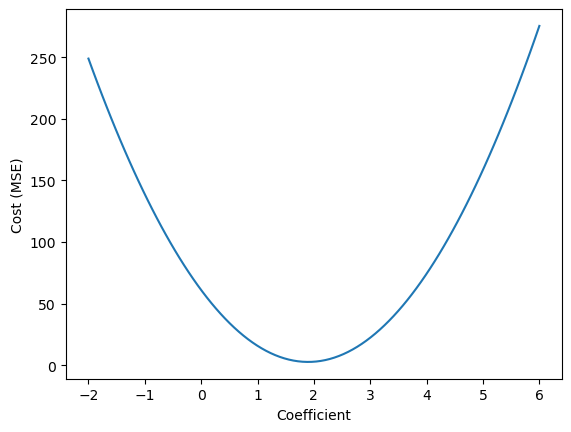

In [11]:
coefs = np.linspace(-2, 6, 100)

cost = []
for c in coefs:
    y_pred = predict(x, c)
    cost.append(mse(y_pred, y))

plt.plot(coefs, cost)
plt.xlabel('Coefficient')
plt.ylabel('Cost (MSE)')

plt.show()

In [12]:
def gradient(x, y, y_pred):
    return np.mean((y_pred - y) * x)

def update(grad, rate):
    return rate * grad

def fit(x, y, coef=0, n_iter=100, rate=0.01):
    for i in range(n_iter):
        #print(coef)
        y_pred = predict(x, coef)
        #print(mse(y_pred, y))
        grad = gradient(x, y, y_pred)
        #print(grad)
        coef -= update(grad, rate)
        
    return coef
        
fit(x, y)

1.8977183020211406

In [13]:
n = 20
x = np.random.uniform(0, 10, n)
y = -5 + x * 2 + np.random.randn(n) * 2
x, y = x.reshape(-1, 1), y.reshape(-1, 1)

x = np.concatenate([np.ones(n).reshape(-1, 1), x], axis=1)
x

array([[1.        , 5.64798958],
       [1.        , 8.41024523],
       [1.        , 7.67570873],
       [1.        , 9.63019318],
       [1.        , 0.28006371],
       [1.        , 9.65821181],
       [1.        , 6.27606654],
       [1.        , 4.66997098],
       [1.        , 7.67438574],
       [1.        , 8.78695977],
       [1.        , 5.89468434],
       [1.        , 2.00498159],
       [1.        , 2.96809774],
       [1.        , 5.94704618],
       [1.        , 1.16555824],
       [1.        , 4.70020336],
       [1.        , 6.27466229],
       [1.        , 5.41489716],
       [1.        , 9.48876104],
       [1.        , 6.45821872]])

In [14]:
def predict(x, coef):
    # Because 1*coef[0] + x[1]*coef[1] + ... +  x[n]*coef[n] is the dot product coef · x
    return np.dot(x, coef).reshape(-1, 1)

def gradient(x, y, y_pred):
    return np.mean((y_pred - y) * x, axis=0)

coef = fit(x, y, coef=np.zeros(2), n_iter=10000)
coef

array([-3.94814914,  1.72041003])

In [15]:
lr = LinearRegression().fit(x[:, 1:], y)
print(lr.intercept_, lr.coef_)

[-3.94814941] [[1.72041006]]


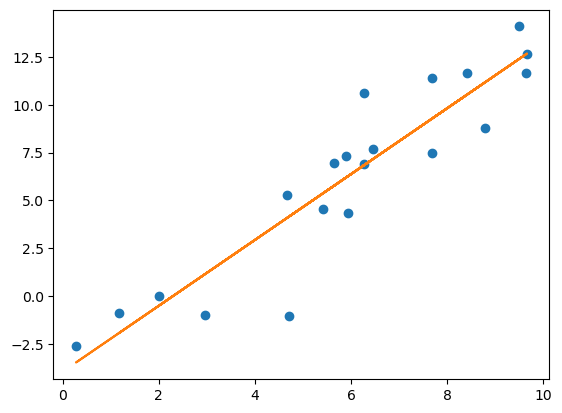

In [16]:
plt.scatter(x[:, 1], y)
plt.plot(x[:, 1], predict(x, coef), 'tab:orange')

plt.show()